,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
cluster,,,,,
0,5.901613,2.748387,4.393548,1.433871,1.225806
1,5.006000,3.428000,1.462000,0.246000,0.000000
2,6.850000,3.073684,5.742105,2.071053,1.947368


กลุ่มที่ K-Means คาดการณ์สำหรับข้อมูลใหม่: [0 2]


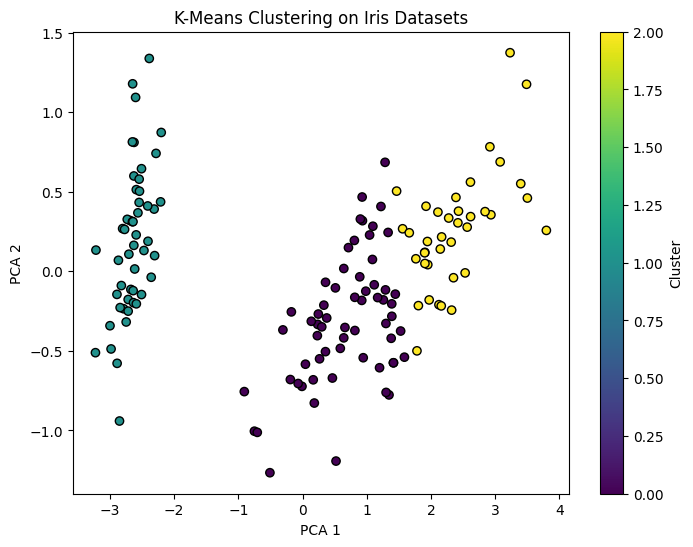

In [ ]:
#นำเข้าไลบรารี
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#โหลดชุดข้อมูล Iris Datasets
iris = datasets.load_iris()
X = iris.data # Features metrix
y = iris.target # Labels จริง (Setosa, Versicolor, Virginica)

#แปลงเป็น DataFrame เพื่อดูข้อมูล
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y # เพื่อคอลัมน์ target เพื่อใช้เปรียบเทียบ

#ใช้ K-Means Clustering แบ่งข้อมูลเป็น 3 กลุ่ม
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

# แสดงค่าเฉลี่ยของแต่ละคลัสเตอร์
cluster_means = df.groupby('cluster').mean()
display(cluster_means) # ใช้ display() เพื่อแสดง DataFrame ใน colab

# ใช้ PCA
pca = PCA(n_components =2)
X_pca = pca.fit_transform(X)

# แสดงผลลัพธ์ของการจัดกลุ่มเป็นกราฟ
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', edgecolor='k',)
plt.title('K-Means Clustering on Iris Datasets')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show

# ทดสอบข้อมูลใหม่
new_data = np.array([[5.5, 2.6, 4.4, 1.2], # น่าจะอยู่ใกล้ Versicolor
                     [6.8, 3.2, 5.9, 2.3]]) # น่าจะอยู่ใกล้ Virginica

# ทำนายกลุ่มของข้อมูลใหม่
predicted_clusters = kmeans.predict(new_data)
print("กลุ่มที่ K-Means คาดการณ์สำหรับข้อมูลใหม่:", predicted_clusters)